In [84]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [85]:
galaxies = pd.read_csv('./LAMOST_spectra/galaxy_standardised.csv')

In [86]:
qsos = pd.read_csv('./LAMOST_spectra/qso_standardised.csv')

In [5]:
spectras = galaxies.append(qsos)
spectras

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
0,0.617188,1.078200,0.719656,0.591135,0.249724,0.576590,0.758004,0.434611,1.019012,0.431297,...,1.230564,2.066841,1.630086,0.345478,1.257950,-0.641574,0.866615,0.845419,0.875861,2
1,-0.105619,-0.615157,-0.151418,-0.192431,0.600306,0.485535,-0.460267,0.562241,0.145672,0.118304,...,0.952100,1.041957,0.870311,1.209000,1.210865,0.831403,0.682861,1.007102,0.998151,2
2,0.608529,0.339985,0.612112,0.704888,0.435795,0.564308,0.521174,0.646109,0.386403,0.227294,...,1.038180,1.026206,0.939450,1.023971,1.122343,0.985136,1.022401,1.032069,1.035573,2
3,-0.125019,1.094082,0.536864,1.023426,2.261266,2.303743,0.980048,0.621883,0.701422,0.720067,...,0.921314,0.763278,0.740817,1.109447,0.645768,0.984002,0.852604,0.803293,0.816611,2
4,0.646874,0.441916,0.839619,0.434925,0.544952,0.256422,0.467634,0.512585,0.236020,0.337063,...,1.184212,1.159360,0.886024,1.422036,1.451235,1.154935,1.108076,1.149500,1.149634,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.358673,2.255526,-1.927181,2.189852,-1.175295,3.158015,1.817735,1.476316,-0.005982,2.614979,...,14.729002,14.190329,6.227650,-6.466226,-6.466477,-6.980642,0.129756,0.899375,2.892127,3
1996,4.736062,8.493721,4.307473,6.376364,6.063689,4.828099,7.034339,5.206685,1.766484,8.031152,...,-2.224697,-2.945363,-3.193636,1.916528,-4.198533,-6.026858,-2.577864,-1.554188,-2.068489,3
1997,2.251206,3.835492,2.401364,2.064844,1.606885,2.835680,2.543361,3.106267,3.807246,3.216638,...,0.240475,0.018851,-0.472121,-0.058201,-0.391158,0.612688,0.288732,0.512242,0.547362,3
1998,1.734387,2.007688,1.798588,1.681123,2.155894,2.156851,1.905678,1.978067,2.447229,2.044550,...,0.460327,0.609559,0.467800,0.139381,-0.047443,0.301798,0.392577,0.467889,0.384213,3


In [6]:
spectras= shuffle(spectras)
spectras

,0,1,2,3,4,5,6,7,8,9,...,2541,2542,2543,2544,2545,2546,2547,2548,2549,type
1224,2.891349,1.437608,1.346257,1.553989,2.882983,2.260688,0.524664,1.037580,0.385678,2.177028,...,1.114744,1.451957,-5.536831,0.532371,8.654653,-0.076086,1.326490,0.453447,0.754747,3
1830,3.879734,5.009363,6.276478,5.035055,5.840371,4.358024,5.324929,4.972554,2.555320,2.953080,...,0.675787,0.591280,1.069435,0.217655,0.115893,0.581067,0.514607,0.462505,0.649936,3
964,0.425303,-0.773273,1.868011,0.401713,2.898418,2.085099,1.737992,1.282685,1.108372,1.779551,...,0.595909,0.576578,0.345612,0.631520,0.907204,-0.226944,-0.068086,0.521514,0.633895,3
778,1.276239,4.518811,2.398222,2.322696,-0.104984,1.534739,3.207106,2.447320,2.416217,3.429941,...,0.434583,0.189397,-0.833621,-1.580476,-0.394436,0.575719,0.741413,0.076439,0.215710,3
112,3.604190,-0.166099,0.796164,3.779741,2.862189,2.297985,1.111864,-4.363558,3.344258,-1.236573,...,1.787055,0.912069,1.118230,-0.070411,-0.277597,0.754682,0.061647,0.575771,0.907901,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.093733,0.183721,0.050577,0.045006,-0.053974,0.103254,0.218459,0.296510,0.321800,0.262396,...,1.072321,1.172215,0.907360,1.556413,0.817625,0.919094,1.151508,1.290080,1.249178,2
532,0.868472,1.438901,1.794490,0.754563,0.680179,0.701802,0.556087,1.235091,0.780536,1.650703,...,0.847327,0.835260,0.950760,0.823709,0.704693,0.701405,0.901184,0.883823,0.856567,2
1813,2.330337,1.271180,2.015320,2.478237,1.989256,1.652456,1.838835,2.860579,3.167940,2.157424,...,0.198369,0.288275,0.102458,0.628728,0.734389,0.408767,0.310602,0.435959,0.471247,3
463,2.992803,4.520074,1.281727,2.560910,0.090832,1.549194,1.371671,-1.630202,-4.321544,-0.210890,...,-0.179296,-3.015679,-2.220191,-2.508168,0.847879,0.454679,-0.945904,-0.030512,0.630526,3


In [91]:
X_train, X_test, y_train, y_test = train_test_split(spectras.iloc[:,0:2550],spectras['type'], test_size=0.2, random_state=0)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(spectras.iloc[:,0:2550],spectras['type'], test_size=0.2)

In [95]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,2540,2541,2542,2543,2544,2545,2546,2547,2548,2549
496,0.453018,-0.078946,1.056244,-0.761460,-0.108049,0.316049,1.684295,1.277893,2.328646,-0.490003,...,1.023142,0.972128,0.877626,0.903512,0.225082,0.656252,1.250650,0.905113,1.123623,1.008364
1241,0.744684,0.706419,0.539418,0.585637,1.159545,0.676108,0.581048,0.410185,0.660224,0.516061,...,0.728807,0.872218,1.278320,0.577979,0.967569,0.949157,0.762882,0.773693,0.721741,0.852410
1864,0.549835,0.339083,1.420260,0.710170,1.010419,0.306943,-0.252886,0.437769,1.991301,0.414019,...,0.846816,3.304601,15.221448,-6.067144,-1.988856,6.030686,2.592641,1.119804,0.687274,0.704317
571,-7.031517,6.187820,-9.371308,8.060097,-3.906795,2.382266,-0.073769,6.968823,2.481344,8.414966,...,1.881450,-0.323327,2.411483,-3.733856,1.817483,-1.802364,3.208507,1.380639,1.492592,0.997739
1094,0.539701,0.670896,-0.184938,0.392194,0.096106,0.525495,0.418713,0.776471,0.828761,0.931785,...,0.894532,0.855367,0.714974,0.750959,0.940317,0.995974,1.013581,0.925367,0.879055,0.889729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,2.394843,1.695996,1.064526,2.684924,1.394738,3.577144,3.067955,0.946760,2.945100,1.817511,...,1.051854,3.754546,8.477930,1.168571,-6.302239,1.473663,-0.638889,0.444808,0.817370,1.119679
478,1.302975,4.023532,0.029693,3.330072,1.782232,1.015794,2.910030,2.706038,3.512573,1.349334,...,0.693626,0.542258,2.424630,-0.655173,0.647713,1.220641,1.382282,0.817242,0.609625,0.833427
1581,0.259939,0.039702,0.313820,0.330721,0.457388,0.079465,0.333012,0.251914,0.294523,-0.090406,...,1.411705,1.464086,1.367845,1.287620,1.276434,1.035445,1.370057,1.555483,1.340720,1.450895
438,1.505315,1.813736,1.585130,1.981320,1.795147,1.644358,1.660030,1.656898,1.302048,1.976754,...,0.591836,1.096665,2.010072,0.355882,-0.075982,0.229903,0.325398,0.396209,0.228675,0.527300


In [23]:
y_train

496     2
1241    2
1864    3
571     2
1094    2
       ..
1378    3
478     3
1581    2
438     3
409     3
Name: type, Length: 3200, dtype: int64

In [96]:
scaler = MinMaxScaler().fit(X_train)

In [40]:
X_train_minmax = scaler.transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [42]:
scaler = StandardScaler().fit(X_train_minmax)

In [43]:
X_train_std = scaler.transform(X_train_minmax)
X_test_std = scaler.transform(X_test_minmax)

In [44]:
pca = PCA(n_components=3)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [47]:
X_train_pca

array([[-1.22708853, -1.97466713,  0.96322612],
       [-1.08824241, -1.98833355,  1.31729912],
       [-1.48126539, -0.86763153,  0.47860654],
       ...,
       [-2.98066801, -8.43210338,  5.83999212],
       [ 0.10952244,  2.71689867, -2.4370318 ],
       [ 0.01992795,  2.80675104, -2.50848414]])

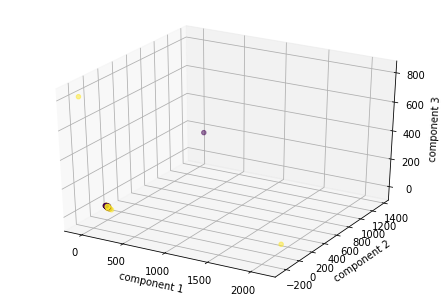

In [97]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train_pca[:,0],X_train_pca[:,1],X_train_pca[:,2],c=y_train,alpha=0.5)
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

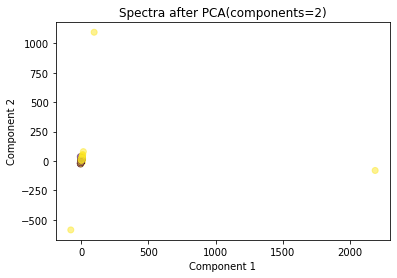

In [28]:
# ax = plt.figure()
# plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=y_train,alpha=0.5)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.title('Spectra after PCA(components=2)')
# plt.show()

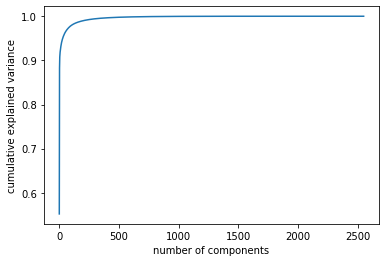

In [98]:
pca=PCA().fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [36]:
pca = PCA(n_components=500)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca

array([[-3.71978188e+01, -1.41418877e+00, -1.89891264e+01, ...,
        -8.30188298e-01, -4.14604081e-01, -5.31432096e-01],
       [-3.88501440e+01,  1.14735320e+00, -1.46524801e+01, ...,
         1.62483877e-01,  1.46106846e-01, -1.61429009e-01],
       [-3.91866403e+01, -1.09620587e+00, -6.92791259e+00, ...,
        -1.49211888e-02, -1.24995228e-01, -7.50978608e-02],
       ...,
       [-3.95706639e+01, -2.83502962e+00, -2.47977053e+00, ...,
         2.75424368e-01,  6.35256314e-02, -1.76100910e-01],
       [-4.11939045e+01,  8.16427298e-01,  7.61207222e+00, ...,
        -1.02201175e-01,  3.18930861e-01, -7.96342761e-02],
       [-4.11512791e+01, -1.79628578e+00,  1.03680603e+01, ...,
         2.07216166e-01,  2.20259600e-02, -3.75345051e-01]])

In [50]:
RandomForestClassifier?

In [99]:
rf = RandomForestClassifier(oob_score=True)

In [100]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [101]:
y_predict_rf = rf.predict(X_test)

In [102]:
y_predict_rf

array([2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2,
       3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2,
       3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2,
       2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3,
       3, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2,

In [103]:
y_predict_proba_rf = rf.predict_proba(X_test)
y_predict_proba_rf

array([[1.  , 0.  ],
       [0.11, 0.89],
       [0.04, 0.96],
       ...,
       [0.1 , 0.9 ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

In [104]:
cnf_matrix = metrics.confusion_matrix(y_test,y_predict_rf)
cnf_matrix

array([[363,  55],
       [ 26, 356]])

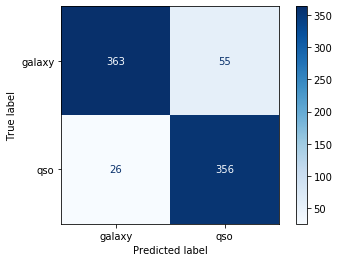

In [105]:
class_names = ['galaxy','qso']
metrics.plot_confusion_matrix(rf, X_test, y_test,display_labels=class_names,
                                 cmap=plt.cm.Blues,values_format='g')

In [68]:
print(metrics.classification_report(y_test,y_predict_rf,target_names=['galaxy','qso']))

              precision    recall  f1-score   support

      galaxy       0.94      0.87      0.91       418
         qso       0.87      0.94      0.90       382

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.90       800
weighted avg       0.91      0.91      0.91       800



In [69]:
metrics.roc_auc_score(y_test, y_predict_rf)

0.9066108870462686

In [70]:
rf.oob_score_

0.9071875

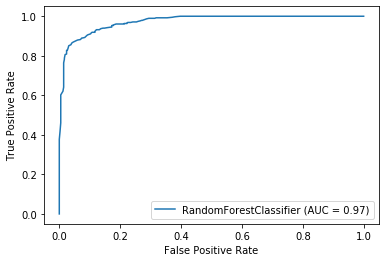

In [106]:
metrics.plot_roc_curve(rf, X_test, y_test)

In [107]:
importance = rf.feature_importances_

In [108]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00017
Feature: 1, Score: 0.00009
Feature: 2, Score: 0.00055
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.00026
Feature: 6, Score: 0.00070
Feature: 7, Score: 0.00040
Feature: 8, Score: 0.00015
Feature: 9, Score: 0.00018
Feature: 10, Score: 0.00061
Feature: 11, Score: 0.00007
Feature: 12, Score: 0.00066
Feature: 13, Score: 0.00054
Feature: 14, Score: 0.00028
Feature: 15, Score: 0.00020
Feature: 16, Score: 0.00136
Feature: 17, Score: 0.00023
Feature: 18, Score: 0.00053
Feature: 19, Score: 0.00039
Feature: 20, Score: 0.00069
Feature: 21, Score: 0.00135
Feature: 22, Score: 0.00082
Feature: 23, Score: 0.00080
Feature: 24, Score: 0.00022
Feature: 25, Score: 0.00081
Feature: 26, Score: 0.00025
Feature: 27, Score: 0.00056
Feature: 28, Score: 0.00117
Feature: 29, Score: 0.00132
Feature: 30, Score: 0.00047
Feature: 31, Score: 0.00091
Feature: 32, Score: 0.00010
Feature: 33, Score: 0.00047
Feature: 34, Score: 0.00008
Feature: 35, Score: 0.00012
Fe

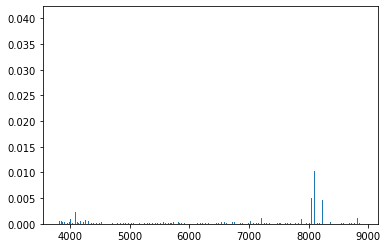

In [109]:
plt.bar([3800+2*x for x in range(len(importance))], importance)
plt.show()

In [110]:
indices = np.argsort(importance)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, 3800+2*indices[f], importance[indices[f]]))

Feature ranking:
1. feature 8242 (0.040318)
2. feature 8090 (0.015053)
3. feature 8220 (0.014865)
4. feature 7904 (0.014450)
5. feature 3976 (0.013556)
6. feature 8244 (0.010650)
7. feature 3978 (0.010539)
8. feature 8238 (0.010312)
9. feature 8330 (0.010310)
10. feature 8010 (0.010310)
11. feature 8252 (0.010234)
12. feature 8098 (0.010202)
13. feature 8204 (0.009970)
14. feature 8138 (0.009953)
15. feature 8328 (0.009906)
16. feature 8156 (0.009893)
17. feature 8374 (0.009865)
18. feature 8178 (0.009807)
19. feature 8246 (0.009754)
20. feature 8050 (0.009497)
21. feature 4034 (0.007333)
22. feature 4038 (0.006462)
23. feature 8146 (0.005833)
24. feature 7436 (0.005817)
25. feature 8100 (0.005727)
26. feature 8094 (0.005702)
27. feature 4110 (0.005685)
28. feature 8372 (0.005617)
29. feature 8092 (0.005526)
30. feature 7848 (0.005500)
31. feature 7790 (0.005411)
32. feature 8096 (0.005402)
33. feature 8008 (0.005379)
34. feature 8072 (0.005358)
35. feature 4092 (0.005337)
36. feature 

In [70]:
cv_scores = cross_val_score(rf,X_train,y_train,cv=3)
mean = np.mean(cv_scores)

In [71]:
mean

0.9131272298232318

In [73]:
param_test= {'n_estimators':range(10,101,10)}  
gsearch= GridSearchCV(estimator = RandomForestClassifier(),  
                       param_grid =param_test, scoring='roc_auc',cv=5)
gsearch.fit(X_train,y_train)  

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [75]:
gsearch.best_params_

{'n_estimators': 90}

In [78]:
gsearch.best_score_

0.9723230639103975

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [92]:
y_predict_proba_knn = knn.predict_proba(X_test_pca)

In [97]:
y_predict_proba_knn

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ]])

In [93]:
y_predict_knn = knn.predict(X_test_pca)

In [96]:
y_predict_knn

array([3, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2,

In [94]:
print(metrics.classification_report(y_test,y_predict_knn,target_names=['galaxy','qso']))

              precision    recall  f1-score   support

      galaxy       0.87      0.88      0.88       417
         qso       0.87      0.85      0.86       383

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [95]:
metrics.roc_auc_score(y_test, y_predict_knn)

0.8681399527897264

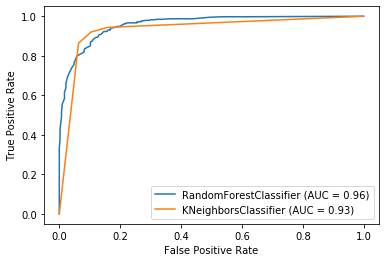

In [205]:
metrics.plot_roc_curve(rf, X_test, y_test)
ax = plt.gca()
metrics.plot_roc_curve(knn, X_test, y_test,ax=ax)
plt.show()